<a href="https://colab.research.google.com/github/JotaPMendes/cursos/blob/main/classificacao_resenhas_imdb_2020/notebooks/nlp_classificacao_resenhas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

resenha = pd.read_csv("/content/drive/My Drive/Colab Notebooks/imdb-reviews-pt-br.csv")
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [ ]:
#Separando o treino e o teste
from sklearn.model_selection  import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                              resenha.sentiment,
                                                              random_state = 42)

In [ ]:
#Análise de uma resenha para ter insight de melhoria
print('Negativa \n')
print(resenha.text_pt[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [ ]:
#Análise de uma resenha para ter insight de melhoria
print('Positiva \n')
print(resenha.text_pt[49002])

Positiva 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [ ]:
#Entender a quantidade de resenhas positivas e negativas, sabendo se poderá introduzir um algoritmo de classificacao.
print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [ ]:
#Mudança da classificação de negativo e positivo para 0 e 1, o que melhora visualização e padronização.

classificacao = resenha["sentiment"].replace(["neg", "pos"], [0,1])
resenha["classificacao"] = classificacao

In [ ]:
#Uso do CountVectorizer para separar as palavras das frases e colocar 0 e 1, criando um algoritmo que por meio de palavras, identifique o sentimento.

from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase = False)
bag_of_words = vetorizar.fit_transform(texto)


In [ ]:
#Transformando em matriz esparsa, cuja função é só levar em conta os 1's, não armazenando na memória os 0's que são maioria.

matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                                                   columns=vetorizar.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [ ]:
# Acrescenta um parâmetro para o CountVectorizer, além de transformar os dados do "text_pt" para uma representação de bag_of_words

vetorizar = CountVectorizer(lowercase = False, max_features = 50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [ ]:
# Função que faz todo o trabalho de classificação em bag_of_words, treina o modelo e imprime acurácia do modelo.
from sklearn.linear_model import LogisticRegression

def classificar_texto(texto, coluna_texto, coluna_classificacao):
  vetorizar = CountVectorizer(lowercase = False, max_features = 50)
  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
  treino, teste, classe_treino, classe_teste = T(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
  regressao_logistica = LogisticRegression(solver = 'lbfgs')
  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste, classe_teste)
print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


In [ ]:
# Criação da WordCloud com intenção de melhorar a acurácia do algoritmo com implementações visuais por meio dos parâmetros.
%matplotlib inline

from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenha.text_pt])

nuvem_palavras = WordCloud(width = 800, height = 500,
                           max_font_size = 110,
                           collocations = False).generate(todas_palavras)

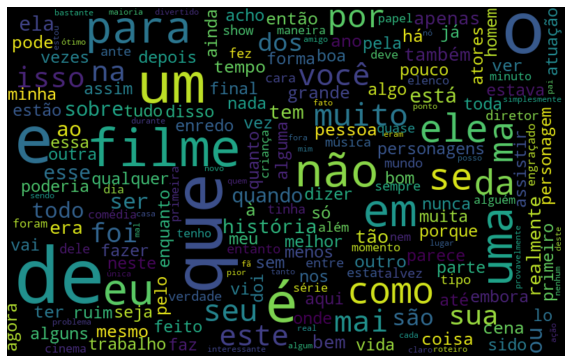

In [ ]:
# Impressão da representação criada pelo WordCloud que sem o PLT não é possível visualização.
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Uso do query para buscar todos os sentimentos classificados como positivos para segregar as palavras chave do data - frame

resenha.query("sentiment == 'pos'")

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [ ]:
# Criação de um data frame somente com as resenhas negativas, utilizando o query
def nuvem_palavras_neg(texto, coluna_texto):
  texto_negativo = texto.query("sentiment == 'neg'")
  todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

  nuvem_palavras = WordCloud(width = 800, height = 500,
                            max_font_size = 110,
                            collocations = False).generate(todas_palavras)
  plt.figure(figsize = (10,7))
  plt.imshow(nuvem_palavras, interpolation = 'bilinear')
  plt.axis("off")
  plt.show()

In [ ]:
# Criação de um data frame somente com as resenhas positivas, utilizando o query
def nuvem_palavras_pos(texto, coluna_texto):
  texto_positivo = texto.query("sentiment == 'pos'")
  todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

  nuvem_palavras = WordCloud(width = 800, height = 500,
                            max_font_size = 110,
                            collocations = False).generate(todas_palavras)
  plt.figure(figsize = (10,7))
  plt.imshow(nuvem_palavras, interpolation = 'bilinear')
  plt.axis("off")
  plt.show()

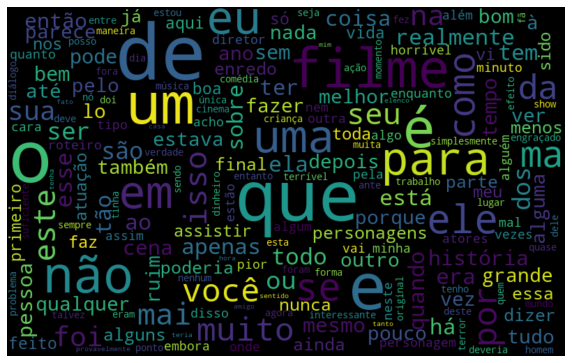

In [ ]:
nuvem_palavras_neg(resenha, "text_pt")

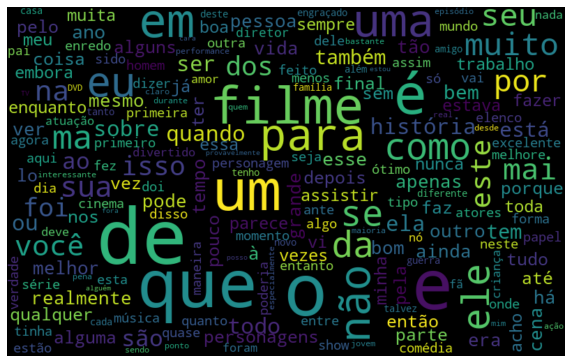

In [ ]:
nuvem_palavras_pos(resenha, "text_pt")

In [ ]:
import nltk

frase = ["um filme ruim", "um filme bom"]
frequencia = nltk.FreqDist(frase)
frequencia


FreqDist({'um filme ruim': 1, 'um filme bom': 1})

In [ ]:
# Uso do Tokenizer para separar as palavras de uma frase, afim de gerar a frequência

from nltk import tokenize

frase = "Bem vindo ao mundo do PLN!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


In [ ]:
# Uso do tokenizer em todas as palavras do data frame das resenhas, adquirindo a quantidade de vezes que cada palavra foi usada.

token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({"Palavra" : list(frequencia.keys()),
                                   "Frequência" : list(frequencia.values())})

In [ ]:
df_frequencia.nlargest(columns = "Frequência", n = 10)

,Palavra,Frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


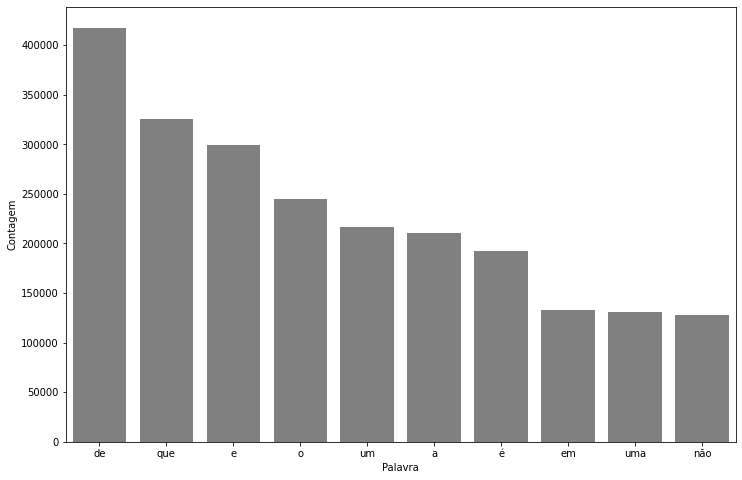

In [ ]:
import seaborn as sns

def pareto(texto, coluna_texto, quantidade):
  todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
  token_frase = token_espaco.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)
  df_frequencia = pd.DataFrame({"Palavra" : list(frequencia.keys()),
                                    "Frequência" : list(frequencia.values())})
  df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
  plt.figure(figsize = (12,8))
  ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
  ax.set(ylabel = "Contagem")
  plt.show()

pareto(resenha, "text_pt", 10)


In [ ]:
import nltk
nltk.download('stopwords')
# Uso do stopwords para segregar as palavras irrelevantes do nosso data frame e ter somente aquelas que importam
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()
for opiniao in resenha.text_pt:  # Usando um loop para acessar cada linha do data frame
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao) # Separar cada palavra de cada linha pelo tokenize
    for palavra in palavras_texto:
      if palavra not in palavras_irrelevantes:
        nova_frase.append(palavra) # Criando uma lista com todas as palavras das frases individuais
    frase_processada.append(' '.join(nova_frase)) # Juntando todas as informações processadas em uma lista

resenha["tratamento_1"] = frase_processada

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [ ]:
classificar_texto(resenha, "tratamento_1", "classificacao")

0.6811160533764659

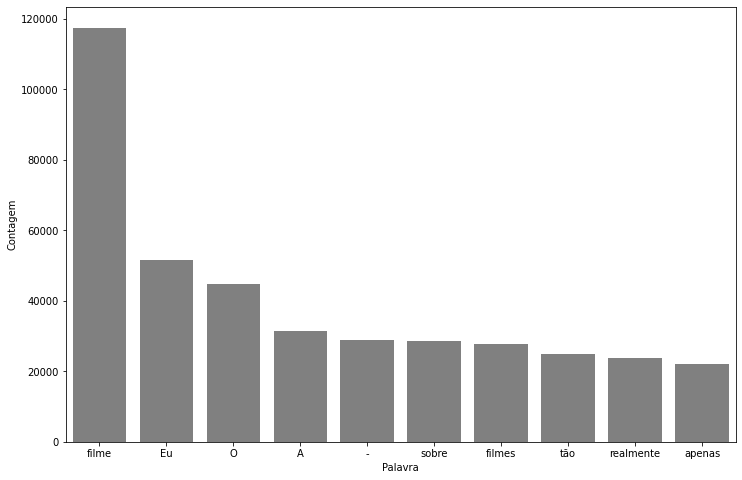

In [ ]:
pareto(resenha, "tratamento_1", 10)

In [ ]:
from nltk import tokenize

frase = "Olá mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
print(token_frase)

['Olá', 'mundo', '!']


In [ ]:
from string import punctuation

pontuacao = list() # Criando uma lista para as pontuações
for ponto in punctuation:
  pontuacao.append(ponto) # Adicionando cada pontuação da biblioteca punctuation

pontuacao_stopwords = pontuacao + palavras_irrelevantes # Juntando os palavras irrelevantes criadas antes com a pontuação

frase_processada = list() # Criando lista para armazenar todas as frases sem pontuação
for opiniao in resenha["tratamento_1"]:
  nova_frase = list() # Criando lista para armazenar cada frase isolada do data frame
  palavras_texto = token_pontuacao.tokenize(opiniao) # Tokenizando as palavras com o WordPunctTokenizer aplicado
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords: # Aplicando as restrições e verificando se alguma palavra coexiste
      nova_frase.append(palavra) # Adicionando na lista de novas frases (isoladas) as palavras com restrições
  frase_processada.append(' '.join(nova_frase)) # Usando o join para colocar na lista geral

resenha["tratamento_2"] = frase_processada

In [ ]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [ ]:
resenha["tratamento_1"][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [ ]:
resenha["tratamento_2"][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

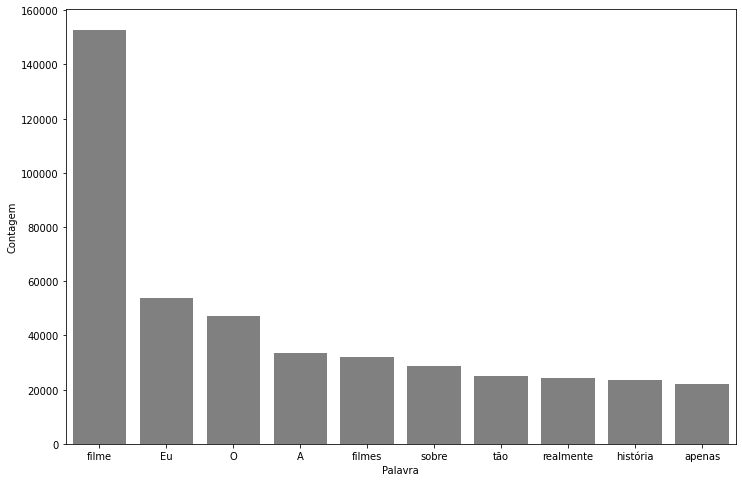

In [ ]:
pareto(resenha, "tratamento_2", 10)

In [ ]:
!pip install unidecode

import unidecode

sem_acentos = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 6.1 MB/s eta 0:00:00


In [ ]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [ ]:
resenha["tratamento_3"] = sem_acentos

frase_processada = list() # Criando lista para armazenar todas as frases sem pontuação
for opiniao in resenha["tratamento_2"]:
  nova_frase = list() # Criando lista para armazenar cada frase isolada do data frame
  palavras_texto = token_pontuacao.tokenize(opiniao) # Tokenizando as palavras com o WordPunctTokenizer aplicado
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords: # Aplicando as restrições e verificando se alguma palavra coexiste
      nova_frase.append(palavra) # Adicionando na lista de novas frases (isoladas) as palavras com restrições
  frase_processada.append(' '.join(nova_frase)) # Usando o join para colocar na lista geral

resenha["tratamento_3 "] = frase_processada

In [ ]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,Filmes fotos latão palavra apropriada verdade ...


In [ ]:
acuracia_tratamento3 = classificar_texto(resenha, "tratamento_3", "classificacao")
print(acuracia_tratamento3)

0.6887990295188031


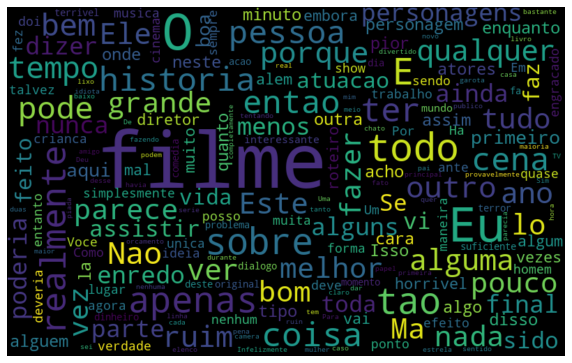

In [ ]:
nuvem_palavras_neg(resenha, "tratamento_3")

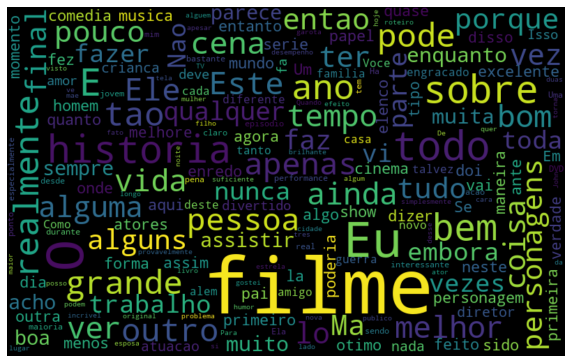

In [ ]:
nuvem_palavras_pos(resenha, "tratamento_3")

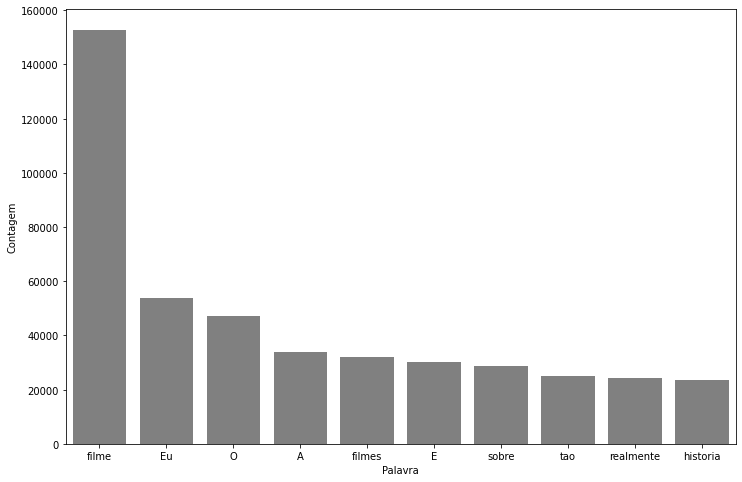

In [ ]:
pareto(resenha, "tratamento_3", 10)

In [ ]:
frase_processada = list() # Criando lista para armazenar todas as frases sem pontuação
for opiniao in resenha["tratamento_3"]:
  nova_frase = list() # Criando lista para armazenar cada frase isolada do data frame
  opiniao = opiniao.lower()
  palavras_texto = token_pontuacao.tokenize(opiniao) # Tokenizando as palavras com o WordPunctTokenizer aplicado
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento: # Aplicando as restrições e verificando se alguma palavra coexiste
      nova_frase.append(palavra) # Adicionando na lista de novas frases (isoladas) as palavras com restrições
  frase_processada.append(' '.join(nova_frase)) # Usando o join para colocar na lista geral

resenha["tratamento_4"] = frase_processada

In [ ]:
resenha["text_pt"][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [ ]:
resenha["tratamento_4"][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [ ]:
acuracia_tratamento4 = classificar_texto(resenha, "tratamento_4", "classificacao")
acuracia_tratamento4

0.6874241811564901

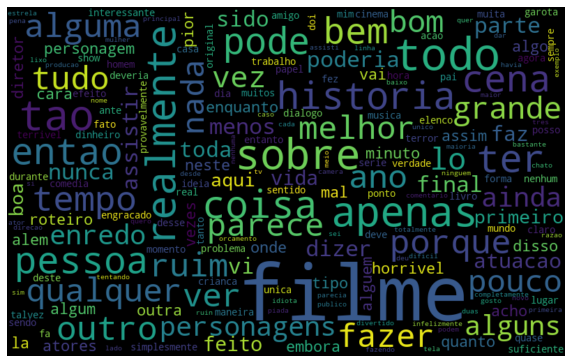

In [ ]:
nuvem_palavras_neg(resenha, "tratamento_4")

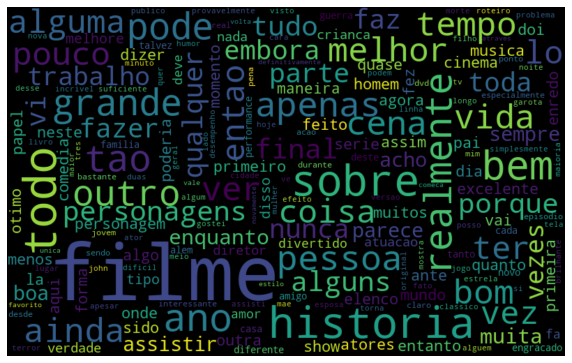

In [ ]:
nuvem_palavras_pos(resenha, "tratamento_4")

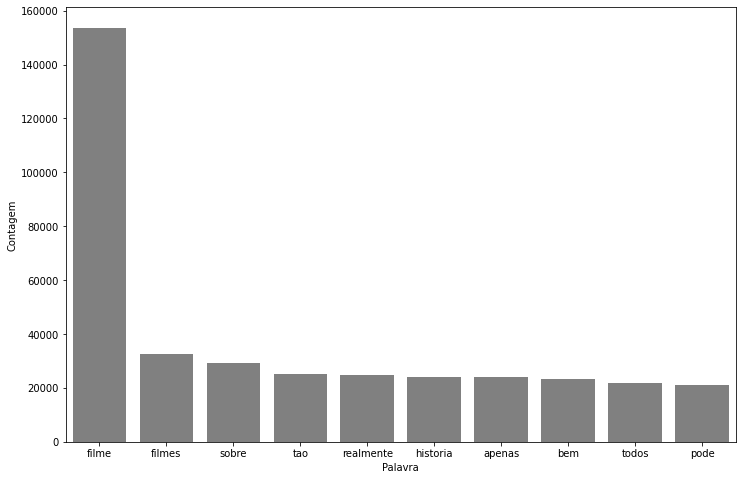

In [ ]:
pareto(resenha, "tratamento_4", 10)

In [ ]:
import nltk
nltk.download('rslp')

from nltk import RSLPStemmer

stemmer = nltk.RSLPStemmer()
stemmer.stem("correria")

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


'corr'

In [ ]:
frase_processada = list() # Criando lista para armazenar todas as frases sem pontuação
for opiniao in resenha["tratamento_4"]:
  nova_frase = list() # Criando lista para armazenar cada frase isolada do data frame
  palavras_texto = token_pontuacao.tokenize(opiniao) # Tokenizando as palavras com o WordPunctTokenizer aplicado
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento: # Aplicando as restrições e verificando se alguma palavra coexiste
      nova_frase.append(stemmer.stem(palavra)) # Adicionando na lista de novas frases (isoladas) as palavras com restrições
  frase_processada.append(' '.join(nova_frase)) # Usando o join para colocar na lista geral

resenha["tratamento_5"] = frase_processada

In [ ]:
acuracia_tratamento5 = classificar_texto(resenha, "tratamento_5", "classificacao")

In [ ]:
print(acuracia_tratamento5)
print(acuracia_tratamento4)

0.6954306510311363
0.6874241811564901


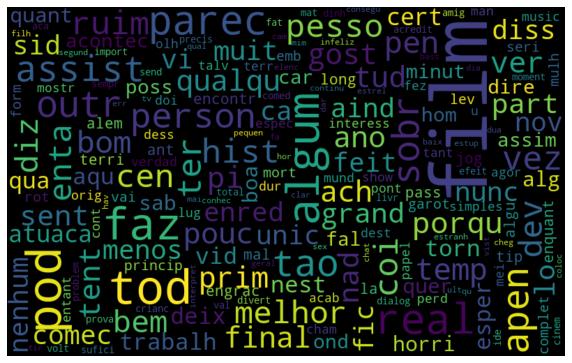

In [ ]:
nuvem_palavras_neg(resenha, "tratamento_5")

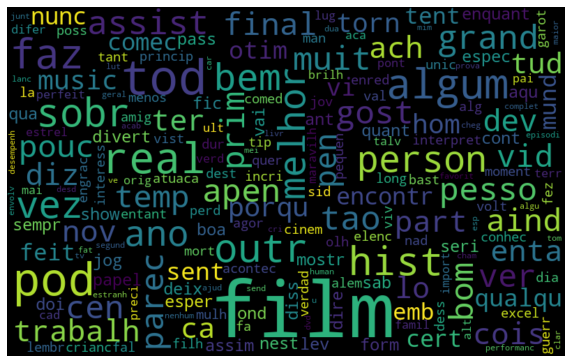

In [ ]:
nuvem_palavras_pos(resenha, "tratamento_5")

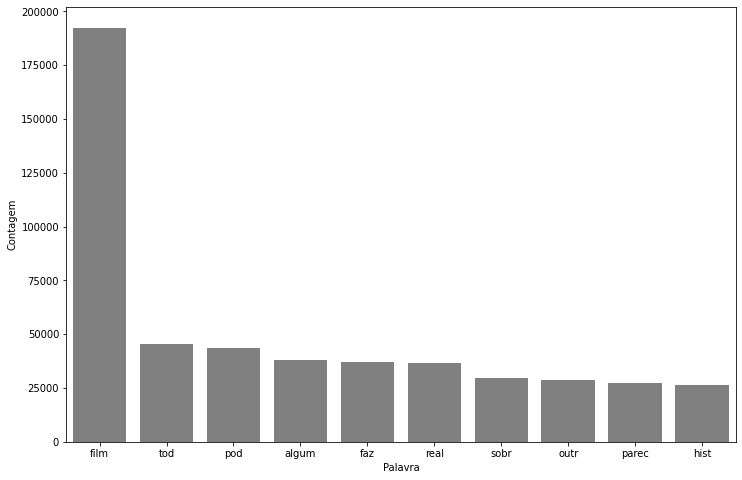

In [ ]:
pareto(resenha, "tratamento_5", 10)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Assisti um filme ótimo", "Assisti um filme péssimo."]

tfidf = TfidfVectorizer(lowercase = False, max_features = 50)

caracteristicas = tfidf.fit_transform(frases)
pd.DataFrame(
    caracteristicas.todense(),
    columns = tfidf.get_feature_names()
)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Assisti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [ ]:
from sklearn.linear_model import LogisticRegression

tfidf_tratados = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados,
                                                              resenha["classificacao"],
                                                              random_state = 42)
regressao_logistica = LogisticRegression(solver = "lbfgs")
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_tratados)
print(acuracia_tratamento5)

0.6963202587949858
0.6954306510311363


In [ ]:
from nltk.util import ngrams

frase = "Assisti um ótimo filme. "
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [ ]:
tfidf = TfidfVectorizer(lowercase = False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)


0.8856449656287909


In [ ]:
tfidf = TfidfVectorizer(lowercase = False)
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf)

0.8847553578649414


In [ ]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names()
)
pesos.nlargest(50,0)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
otim,8.308451
excel,7.993105
perfeit,6.548647
favorit,5.781222
maravilh,5.291919
incri,5.052568
hilari,4.654489
divert,4.552203
ador,4.410095
brilh,4.268983


In [ ]:
pesos.nsmallest(50,0)

,0
pi,-9.184374
ruim,-9.178711
horri,-8.761561
terri,-7.195839
chat,-6.921857
nad,-6.032458
infeliz,-5.298478
decepca,-4.985072
ridicul,-4.971446
parec,-4.938893
